<a href="https://colab.research.google.com/github/LauraMeiya/programacio_Numerica/blob/main/M2T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Open the choosen file
movies = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat', sep='::', encoding='latin-1', index_col=0, names=['Number', 'Movie', 'Genre'])

In [2]:
movies.head(10)

,Movie,Genre
Number,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action


In [3]:
movies.iloc[69]

Movie             From Dusk Till Dawn (1996)
Genre    Action|Comedy|Crime|Horror|Thriller
Name: 70, dtype: object

In [4]:
mov = movies.join(movies['Genre'].str.split('|',5, expand=True).rename(columns={0:'Genre A', 1:'Genre B', 2:'Genre C', 3:'Genre D',4:'Genre E',5:'Genre F'}))

In [5]:
mov

,Movie,Genre,Genre A,Genre B,Genre C,Genre D,Genre E,Genre F
Number,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...
3948,Meet the Parents (2000),Comedy,Comedy,None,None,None,None,None
3949,Requiem for a Dream (2000),Drama,Drama,None,None,None,None,None
3950,Tigerland (2000),Drama,Drama,None,None,None,None,None


In [7]:
muv = mov.join(movies['Movie'].str.split('(',1, expand=True).rename(columns={0:'Movies', 1:'Year'}))
second_column = muv.pop('Year')
muv.insert(0, 'Year', second_column)
first_column = muv.pop('Movies')
muv.insert(0, 'Movies', first_column)
muv['Year'] = muv['Year'].str.replace(')','')

muv

,Movies,Year,Movie,Genre,Genre A,Genre B,Genre C,Genre D,Genre E,Genre F
Number,,,,,,,,,,
1,Toy Story,1995,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
2,Jumanji,1995,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
3,Grumpier Old Men,1995,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
4,Waiting to Exhale,1995,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
5,Father of the Bride Part II,1995,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3948,Meet the Parents,2000,Meet the Parents (2000),Comedy,Comedy,None,None,None,None,None
3949,Requiem for a Dream,2000,Requiem for a Dream (2000),Drama,Drama,None,None,None,None,None
3950,Tigerland,2000,Tigerland (2000),Drama,Drama,None,None,None,None,None


In [8]:
del muv['Movie']
del muv['Genre']

muv.head()

,Movies,Year,Genre A,Genre B,Genre C,Genre D,Genre E,Genre F
Number,,,,,,,,
1,Toy Story,1995,Animation,Children's,Comedy,None,None,None
2,Jumanji,1995,Adventure,Children's,Fantasy,None,None,None
3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None
4,Waiting to Exhale,1995,Comedy,Drama,None,None,None,None
5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None


In [14]:
muv['Genres'] = muv[muv.columns[2:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
muv

,Movies,Year,Genre A,Genre B,Genre C,Genre D,Genre E,Genre F,Genres
Number,,,,,,,,,
1,Toy Story,1995,Animation,Children's,Comedy,None,None,None,"Animation,Children's,Comedy"
2,Jumanji,1995,Adventure,Children's,Fantasy,None,None,None,"Adventure,Children's,Fantasy"
3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None,"Comedy,Romance"
4,Waiting to Exhale,1995,Comedy,Drama,None,None,None,None,"Comedy,Drama"
5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None,Comedy
...,...,...,...,...,...,...,...,...,...
3948,Meet the Parents,2000,Comedy,None,None,None,None,None,Comedy
3949,Requiem for a Dream,2000,Drama,None,None,None,None,None,Drama
3950,Tigerland,2000,Drama,None,None,None,None,None,Drama


In [17]:
counts = muv['Genre A'].value_counts()

Text(0.5, 1.0, 'Number of films with a certain genre')

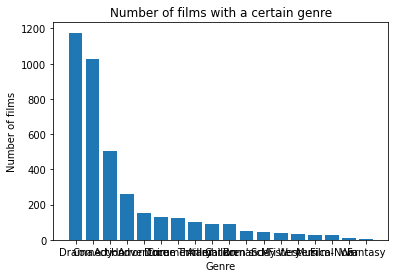

In [18]:
plt.bar(counts.index, counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of films')
plt.title('Number of films with a certain genre')

In [12]:
grouped = muv.groupby('Year')

print (grouped.get_group('1995'))


                                                   Movies  Year  ... Genre E Genre F
Number                                                           ...                
1                                              Toy Story   1995  ...    None    None
2                                                Jumanji   1995  ...    None    None
3                                       Grumpier Old Men   1995  ...    None    None
4                                      Waiting to Exhale   1995  ...    None    None
5                            Father of the Bride Part II   1995  ...    None    None
...                                                   ...   ...  ...     ...     ...
2818                                       Iron Eagle IV   1995  ...    None    None
3046    Incredibly True Adventure of Two Girls in Love...  1995  ...    None    None
3446                                         Funny Bones   1995  ...    None    None
3477                                      Empire Records   1995  